Задание 1

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
boston=load_boston()

In [2]:
data=boston.data
feature_names = boston.feature_names
target = boston.target
y=pd.DataFrame(target, columns = ['price'])
X=pd.DataFrame(data, columns = feature_names)

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

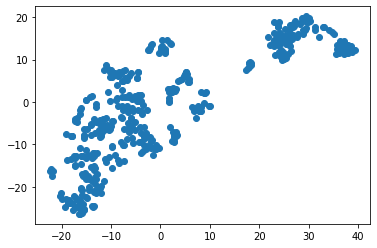

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=100)
labels_train = kmeans.fit_predict(X_train_scaled)

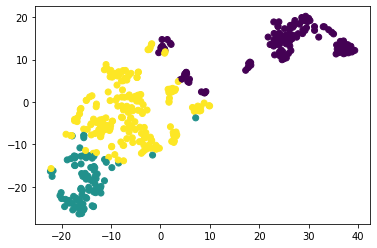

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [10]:
price=y_train[labels_train == 0].mean()
crim=X_train[labels_train == 0][['CRIM']].mean()
print(f'{price.values},{crim.values}')

[16.16535433],[10.79702843]


In [11]:
price=y_train[labels_train == 1].mean()
crim=X_train[labels_train == 1][['CRIM']].mean()
print(f'{price.values},{crim.values}')

[27.78837209],[0.07356558]


In [12]:
price=y_train[labels_train == 2].mean()
crim=X_train[labels_train == 2][['CRIM']].mean()
print(f'{price.values},{crim.values}')

[24.95811518],[0.42166021]


Задание 3

In [13]:
labels_train = kmeans.fit_predict(X_test_scaled)

In [14]:
price=y_test[labels_train == 0].mean()
crim=X_test[labels_train == 0][['CRIM']].mean()
print(f'{price.values},{crim.values}')

[16.71052632],[9.41918184]


In [15]:
price=y_test[labels_train == 1].mean()
crim=X_test[labels_train == 1][['CRIM']].mean()
print(f'{price.values},{crim.values}')

[22.69090909],[0.21929691]


In [16]:
price=y_test[labels_train == 2].mean()
crim=X_test[labels_train == 2][['CRIM']].mean()
print(f'{price.values},{crim.values}')

[34.31111111],[0.04070333]
